# Life Expectancy and GDP

While working on this project, I used data from the World Health Organization and the World Bank to investigate the relationship between the economic output of six countries and the life expectancy of its citizens.

My goals were to prepare the data, perform analysis with plots, and explain my findings.

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Preparation

First, I imported **Pandas**, **pyplot**, and **seaborn**.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Then, I loaded the data into a data frame named `all_data`.

In [2]:
all_data = pd.read_csv("all_data.csv")

Once `all_data` was loaded, I looked at the names of each column.

In [3]:
all_data.columns

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')

The dataset contains four columns with the following information:
* Country
* Year
* Life expectancy at birth in years
* GDP

Along with those four columns, there are 96 rows. 

In [4]:
all_data.shape

(96, 4)

After that, I inspected data types. The 'Year' column is numerical, while the others are categorical.

In [5]:
all_data.dtypes

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

Next, I searched for missing data and found that the dataset is complete.

In [6]:
all_data.isna().any().any()

False

Then, I inspected the first five lines of data.

In [7]:
all_data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


#### Cleaning Column Name

Compared to the others, the name of the third column (`Life expectancy at birth (years)`) is a bit long, so I used the *rename* function to change the column name to `Avg Lifetime`.

In [8]:
all_data = all_data.rename({"Life expectancy at birth (years)":"Avg Lifetime"}, axis = "columns")
all_data.head()

,Country,Year,Avg Lifetime,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Data Exploration

There are six countries in the dataset: Chile, China, Germany, Mexico, the United States of America, and Zimbabwe.

In [9]:
print(all_data.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


To keep the information tidy, I used the *replace* function to change 'United States of America' to 'US'.

In [10]:
all_data = all_data.replace("United States of America","US")
print(all_data.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'US' 'Zimbabwe']


Information collected from 2000 - 2015 comprised the dataset. 

In [11]:
print(all_data.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In addition to learning the `Life expectancy at birth (years)` by `Year`, `Country`, and `GDP`, I wanted to extrapolate the average `Life expectancy at birth (years)` and `GDP` by `Country` from 2000 - 2015.

In [12]:
all_data_Means = all_data.drop("Year", axis = 1).groupby("Country").mean().reset_index()
all_data_Means = all_data_Means.rename({"GDP":"Avg GDP"}, axis = "columns")
all_data_Means

,Country,Avg Lifetime,Avg GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,US,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


### Bar Charts

The first bar chart shows the `Life expectancy at birth (years)` by `Country`.

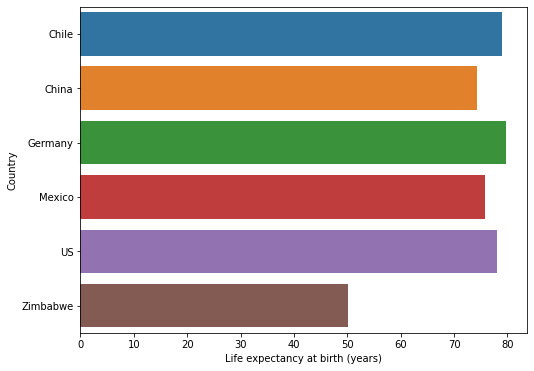

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(x="Avg Lifetime", y="Country", data=all_data_Means)
plt.xlabel("Life expectancy at birth (years)");

Except for Zimbabwe, all of the countries have an approximate life expectancy of 77 years.

The second bar chart shows the `Avg GDP` by `Country`.

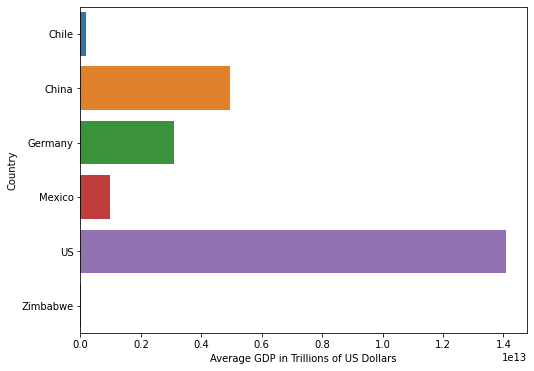

In [14]:
plt.figure(figsize=(8,6))
sns.barplot(x="Avg GDP", y="Country", data=all_data_Means)
plt.xlabel("Average GDP in Trillions of US Dollars");

The US had a *colossal* GDP compared to the other countries. China, Germany, and Mexico seem to be relatively even in comparison, while Zimbabwe does not even register.

### Violin Plots

In the first violin plot, China and the US have a relatively wide GDP range. In contrast, Zimbabwe, Chile, and Mexico have shorter spans.

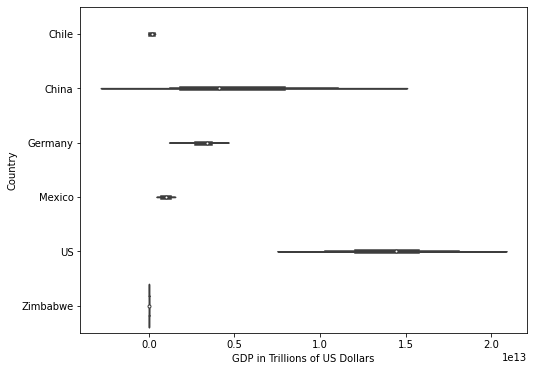

In [15]:
plt.figure(figsize=(8,6))
sns.violinplot(x="GDP", y="Country", data=all_data)
plt.xlabel("GDP in Trillions of US Dollars");

In the second violin plot, all countries have short life expectancy ranges except for Zimbabwe.

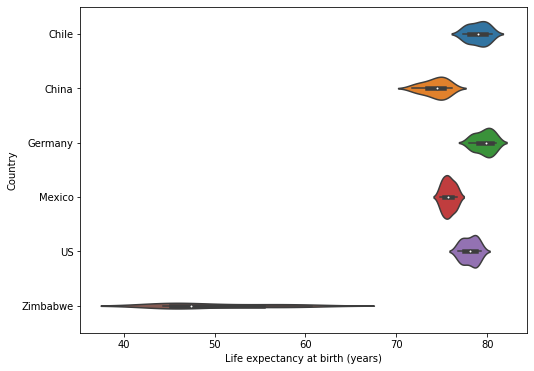

In [16]:
plt.figure(figsize=(8,6))
sns.violinplot(x="Avg Lifetime", y="Country", data=all_data)
plt.xlabel("Life expectancy at birth (years)");

### Strip Plots

To define the data more effectively, I employed strip plots. First, a standalone strip plot is displayed.

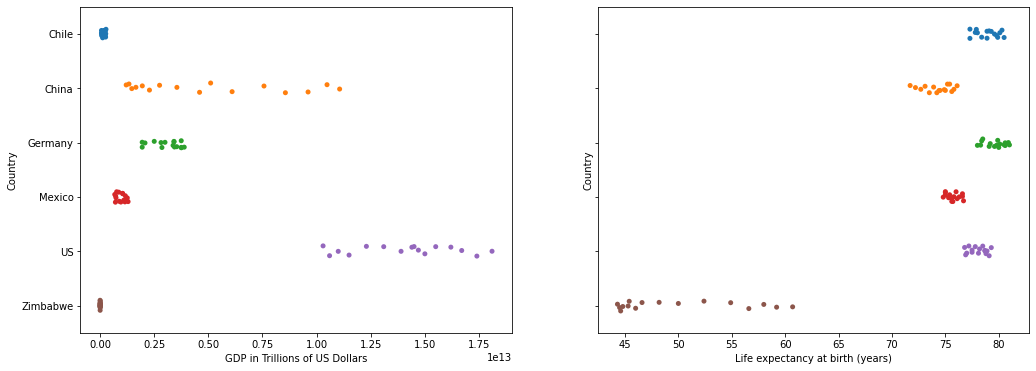

In [17]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(17, 6))
axes[0] = sns.stripplot(ax=axes[0], x="GDP", y="Country", data=all_data)
axes[0].set_xlabel("GDP in Trillions of US Dollars")
axes[1] = sns.stripplot(ax=axes[1], x="Avg Lifetime", y="Country", data=all_data)
axes[1].set_xlabel("Life expectancy at birth (years)");

Then, I overlaid strip plots on top of violin plots.

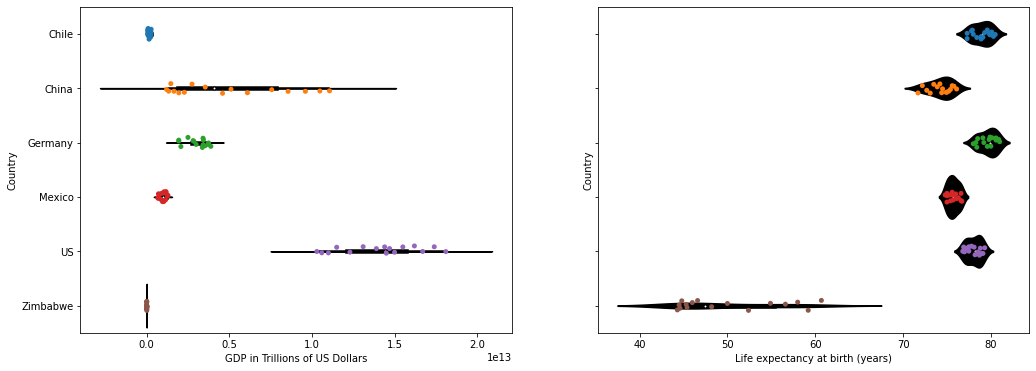

In [18]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(17, 6))
axes[0] = sns.violinplot(ax=axes[0], x="GDP", y="Country", data=all_data, color="black")
axes[0] = sns.stripplot(ax=axes[0], x="GDP", y="Country", data=all_data)
axes[0].set_xlabel("GDP in Trillions of US Dollars")
axes[1] = sns.violinplot(ax=axes[1], x="Avg Lifetime", y="Country", data=all_data, color="black")
axes[1] = sns.stripplot(ax=axes[1], x="Avg Lifetime", y="Country", data=all_data)
axes[1].set_xlabel("Life expectancy at birth (years)");

In the case of the `GDP` plot on the left, Chile and Zimbabwe have a vertical line of dots that illustrate the number of data points that fall around their values. This detail would not have been as evident in just a violin plot.

### Line Graphs

In the first line chart, the US and China have experienced substantial financial gains from 2000 to 2015. China went from less than a quarter trillion dollars to one trillion over fifteen years. The remaining countries did not see similar increases. 

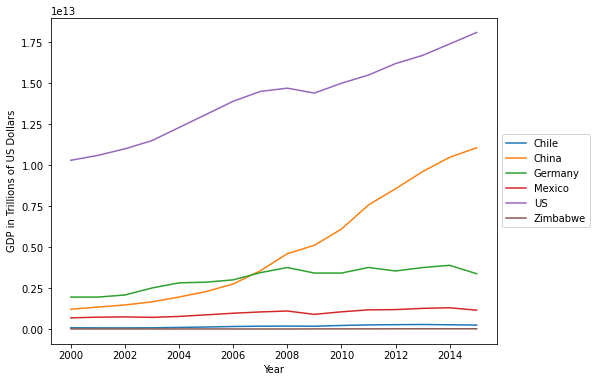

In [19]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Year", y="GDP", hue="Country", data=all_data)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of US Dollars");

When shown with individual line graphs, it is clear all of the countries experienced growth.

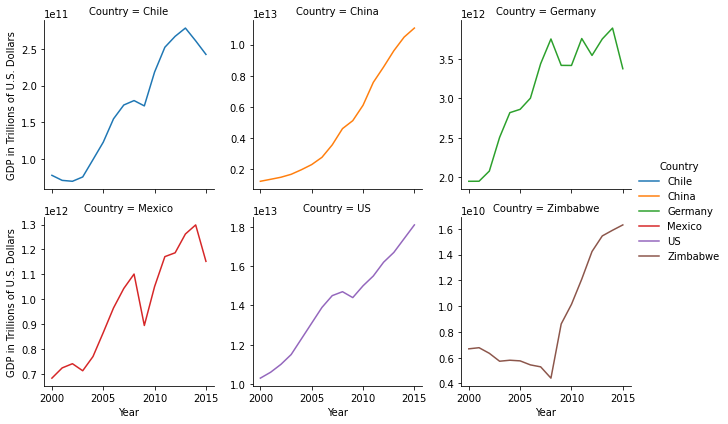

In [20]:
graphGDPYear = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDPYear = (graphGDPYear.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"));

Every country has seen a rise in life expectancy. Zimbabwe experienced the most significant increase after a bit of a dip around 2004.

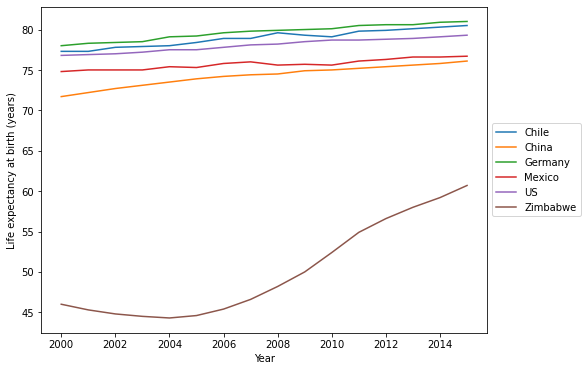

In [21]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Year", y="Avg Lifetime", hue="Country", data=all_data)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)");

Much like the breakdown of GDP by Country before, when shown with individual line graphs, it is clear all of the countries experienced a life expectancy increase. While the singular graphs show, the gains were not as linear and smooth as first perceived, Chile and Mexico experienced dips around the same time.

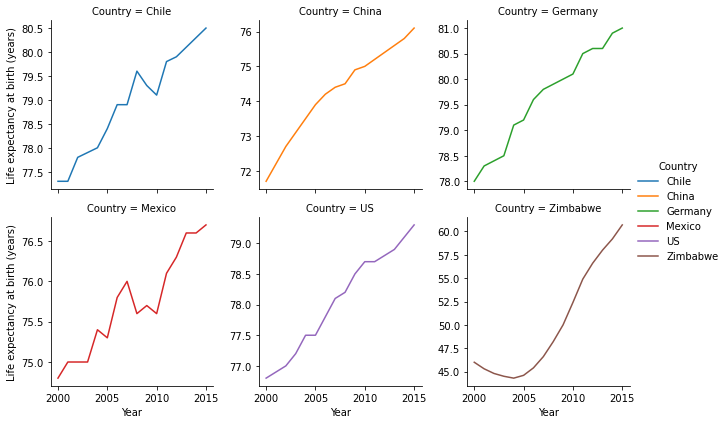

In [22]:
graphLifeCountry = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLifeCountry = (graphLifeCountry.map(sns.lineplot,"Year","Avg Lifetime")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"));

### Scatterplots

Scatterplots explored the relationship between `GDP` and `Life expectancy`. In the first graph, as `GDP` goes up, so, too, does `Life expectancy`, except in Zimbabwe.

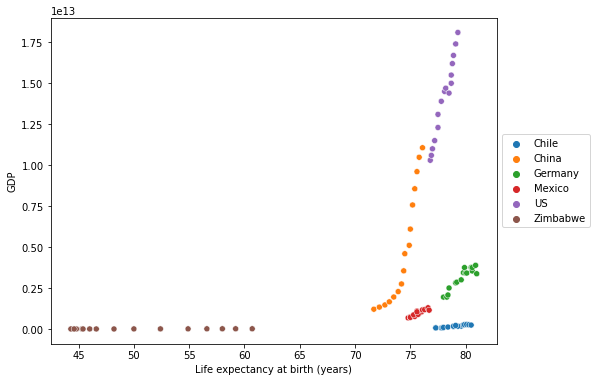

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Avg Lifetime", y="GDP", hue="Country", data=all_data).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel("Life expectancy at birth (years)");

When broken out into individual plots, one can see a positive correlation between `GDP` and `Life expectancy` for all of the countries more clearly. Most countries have linear relationships between `GDP` and `Life expectancy`.  On the other hand, China has a slightly exponential curve, and Chile's curve looks a bit logarithmic.

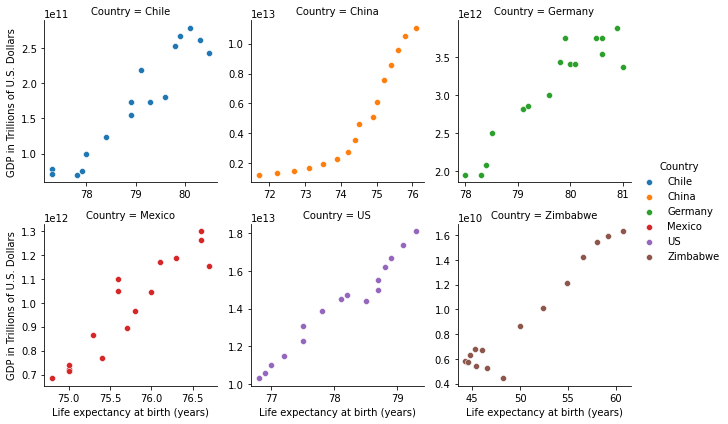

In [24]:
graphGDPLife = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graphGDPLife = (graphGDPLife.map(sns.scatterplot,"Avg Lifetime", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));

During this project, I was able to make quite a few data visualizations with the data. I also learned a few things:

- Life expectancy has increased over time, with Zimbabwe having the most significant increase.
- GDP has also increased for all of the countries involved, especially for China.
- There is a positive correlation between GDP and life expectancy for the countries.
- The average life expectancy was 77 for the countries except for Zimbabwe. Zimbabwe had a life expectancy of 50.
- The life expectancy had a left skew distribution, or most of the observations were on the right side.